In [1]:
pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 20.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-py3-none-any.whl size=136905 sha256=fd1483a480937abcd8efad2d6635875657556db9fb95f46daa2a6c0f9d7b2787
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c1/c6/98/596764d33a44aa6fea2b82c3b995bb1db3b013ec7a6321f8ed
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation: requests 2.29.0
    Uninstalling requests-2.29.0:
      Successfully uninstalled requests-2

**Question 1: Use yfinance to Extract Stock Data**

In [2]:
import yfinance as yf

# Download Tesla stock data
tesla_data = yf.download("TSLA", start="2023-01-01", end="2023-04-01")

# Reset the index
tesla_data_reset = tesla_data.reset_index()

# Save the dataframe to a CSV file
tesla_data_reset.to_csv("tesla_data.csv", index=False)

# Display the first five rows
print(tesla_data_reset.head())


[*********************100%%**********************]  1 of 1 completed

        Date        Open        High         Low       Close   Adj Close  \
0 2023-01-03  118.470001  118.800003  104.639999  108.099998  108.099998   
1 2023-01-04  109.110001  114.589996  107.519997  113.639999  113.639999   
2 2023-01-05  110.510002  111.750000  107.160004  110.339996  110.339996   
3 2023-01-06  103.000000  114.389999  101.809998  113.059998  113.059998   
4 2023-01-09  118.959999  123.519997  117.110001  119.769997  119.769997   

      Volume  
0  231402800  
1  180389000  
2  157986300  
3  220911100  
4  190284000  


**Question 2: Use Webscraping to Extract Tesla Revenue Data**

In [6]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define the URL to scrape
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables on the page
tables = soup.find_all('table')

# Loop through tables to find the one containing revenue data
for table in tables:
    headers = [header.text.strip() for header in table.find_all('th')]
    if 'Tesla Quarterly Revenue' in headers:
        # Extract table rows
        rows = []
        for row in table.find_all('tr')[1:]:
            rows.append([cell.text.strip() for cell in row.find_all('td')])

        # Create a DataFrame from the extracted data
        tesla_revenue = pd.DataFrame(rows, columns=headers)

        # Display the last five rows
        print(tesla_revenue.tail())
        break
else:
    print("Tesla revenue data table not found on the webpage.")


Tesla revenue data table not found on the webpage.


**Question 3: Use yfinance to Extract Stock Data**

In [7]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = 'GME'

# Download stock data
gme_data = yf.download(ticker_symbol, start='2020-01-01', end='2024-01-01')

# Reset index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())

# Save the DataFrame to a CSV file
gme_data.to_csv('gme_stock_data.csv', index=False)


[*********************100%%**********************]  1 of 1 completed

        Date    Open    High     Low   Close  Adj Close    Volume
0 2020-01-02  1.5350  1.6175  1.5175  1.5775     1.5775  17814400
1 2020-01-03  1.5525  1.5625  1.4600  1.4700     1.4700  14175600
2 2020-01-06  1.4500  1.4775  1.4000  1.4625     1.4625  13579200
3 2020-01-07  1.4425  1.4575  1.3600  1.3800     1.3800  20912000
4 2020-01-08  1.3725  1.4625  1.3525  1.4300     1.4300  22517600


**Question 4: Use Webscraping to Extract GME Revenue Data**

In [9]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define the URL to scrape
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables on the page
tables = soup.find_all('table')

# Loop through tables to find the one containing revenue data
for table in tables:
    headers = [header.text.strip() for header in table.find_all('th')]
    if 'GameStop Quarterly Revenue' in headers:
        # Extract table rows
        rows = []
        for row in table.find_all('tr')[1:]:
            rows.append([cell.text.strip() for cell in row.find_all('td')])

        # Create a DataFrame from the extracted data
        gme_revenue = pd.DataFrame(rows, columns=headers)

        # Display the last five rows
        print(gme_revenue.tail())
        break
else:
    print("GameStop revenue data table not found on the webpage.")


GameStop revenue data table not found on the webpage.


**Question 5: Plot Tesla Stock Graph**

[*********************100%%**********************]  1 of 1 completed


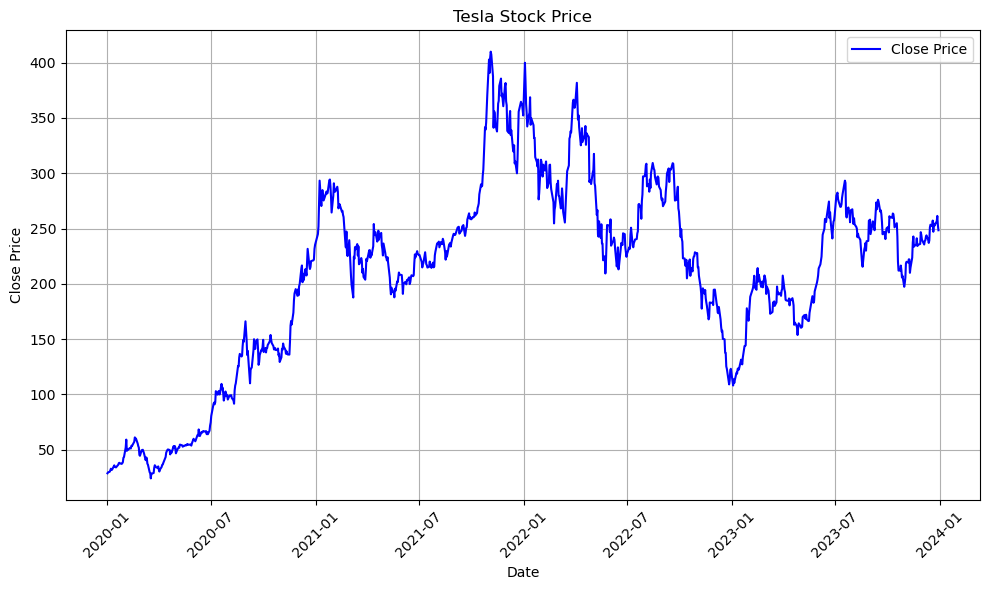

In [12]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Close Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Define the ticker symbol
ticker_symbol = 'TSLA'

# Download stock data
tesla_data = yf.download(ticker_symbol, start='2020-01-01', end='2024-01-01')

# Plot the graph
make_graph(tesla_data, title='Tesla Stock Price')


**Question 6: Plot GameStop Stock Graph**

[*********************100%%**********************]  1 of 1 completed


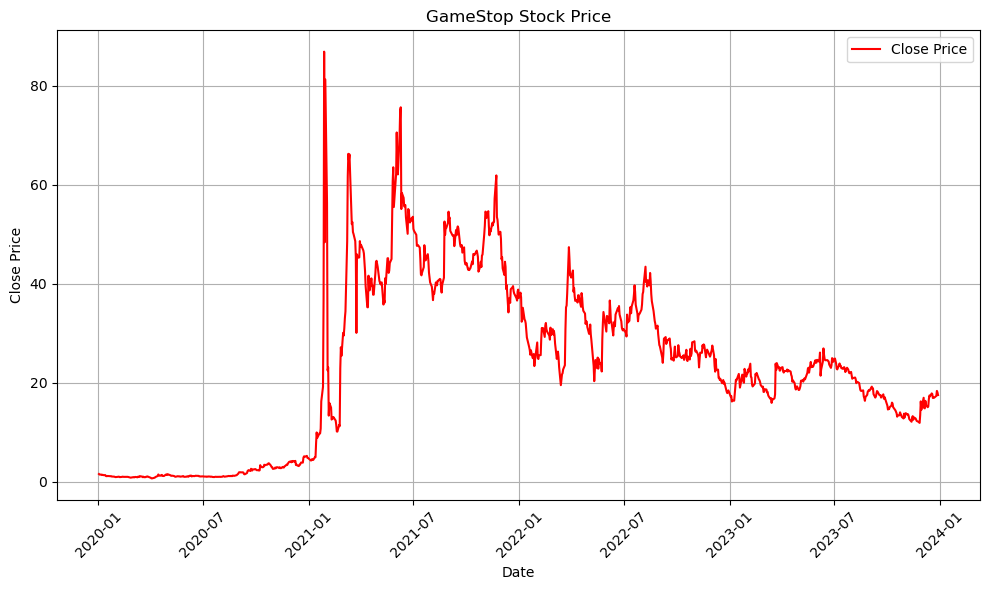

In [13]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Close Price', color='red')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Define the ticker symbol
ticker_symbol = 'GME'

# Download stock data
gme_data = yf.download(ticker_symbol, start='2020-01-01', end='2024-01-01')

# Plot the graph
make_graph(gme_data, title='GameStop Stock Price')
